In [12]:
# # Collaborative Filtering

# # 만점 조건이 없다 !!!!!
# from sklearn.metrics.pairwise import cosine_similarity
# from numpy.linalg import norm
# import numpy as np

# # 코사인 유사도 구할때 비어있는 칸은 -> 해당 행의 평균 값으로 채우자!!
# item1 = np.array([2, 3, 5, 2, 3])
# item2 = np.array([2, 4, 3, 2, 4])
# item3 = np.array([5, 3.5, 4, 2, 3])

# item4 = np.array([5, 4, 1, 3, 2])
# item5 = np.array([2, 4, 3, 5, 1])

# itemA = []
# itemB = []
# itemC = []
# itemD = []
# itemE = []

# # 모든 값에서 평균을 빼주자!! -> 다시 배열에 담기
# for i in range(5):
#     itemA.append(item1[i]-item1.mean())
#     itemB.append(item2[i]-(item2.mean()))
#     itemC.append(item3[i]-(item3.mean()))
#     itemD.append(item4[i]-(item4.mean()))
#     itemE.append(item5[i]-(item5.mean()))

# # 코사인 유사도 공식
# def cos_sim(A, B):
#     return np.dot(A,B)/(norm(A)*norm(B))

# # print(cosine_similarity(item2,item1))
# # print(cosine_similarity(item2,item2))
# # print(cosine_similarity(item2, item3))
# # print(cosine_similarity(item2, item4))
# # print(cosine_similarity(item2, item5))

# print(cos_sim(itemB, itemA))
# print(cos_sim(itemB, itemB))
# print(cos_sim(itemB, itemC))
# print(cos_sim(itemB, itemD))
# print(cos_sim(itemB, itemE))


# cos_item1 = cos_sim(itemB, itemA)
# cos_item3 = cos_sim(itemB, itemC)

# # Collaborative Filtering
# cf = ((5.0 * cos_item1) + (4 * cos_item3)) / (cos_item1 + cos_item3)

# bias = (item1.sum() + 12 + 14 + item4.sum() + item5.sum())/23
# print(bias)

# c_bias = (5 + 4 + 1 + 3)/4
# print(c_bias)


# baseline = bias + (bias - 3) + (bias - c_bias)
# print(baseline)


# cf_= baseline + (((5.0 - baseline)*cos_item1) + ((4.0 - baseline)*cos_item3)) / (cos_item3 + cos_item1)


# # 
# print(cf)
# print(cf_)

In [13]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Collaborative
v1_mean = np.array([2,3,5,2,3]).mean()
v2_mean = np.array([2,4,2,4]).mean()
v3_mean = np.array([5,4,2,3]).mean()
v4_mean = np.array([5,4,1,3,2]).mean()
v5_mean = np.array([2,4,3,5,1]).mean()

v1 = np.array([2,3,5,2,3]) - v1_mean
v2 = np.array([2,4,v2_mean,2,4]) - v2_mean
v3 = np.array([5,v3_mean,4,2,3]) - v3_mean
v4 = np.array([5,4,1,3,2]) - v4_mean
v5 = np.array([2,4,3,5,1]) - v5_mean

arrays = np.array([v1, v2, v3, v4, v5])
v2 = v2.reshape(1, -1)
cos = cosine_similarity(arrays, v2)
res = ((cos[0] * 5) + (cos[2] * 4)) / (cos[0] + cos[2])
print(round(res[0],3))

# Collaborative + bias
all = np.array([2,3,5,2,3,2,4,2,4,5,4,2,3,5,4,1,3,2,2,4,3,5,1]).mean() # 전체 평점 평균
target = np.array([2,4,2,4]).mean() # 평점 매기려는 영화의 평점 평균
user = np.array([5,4,1,3]).mean() # 한 유저가 매긴 평점 평균
baseline = all + (target - all) + (user - all) # baseline 값
res = baseline + (((cos[0] * (5 - baseline)) + (cos[2] * (4 - baseline))) / (cos[0] + cos[2]))
print(round(res[0],3))

5.377
5.377


2번
항상 값이 높다고 좋은것이 아니다. 너무 높으면 Overfitting 또는 Underfitting이 일어날 수 있다.

적당한 값을 찾는 것이 중요하다!!

4번. 고정시키고 ~ -> linear Regression

/Users/mok/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mok/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mok/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mok/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will c

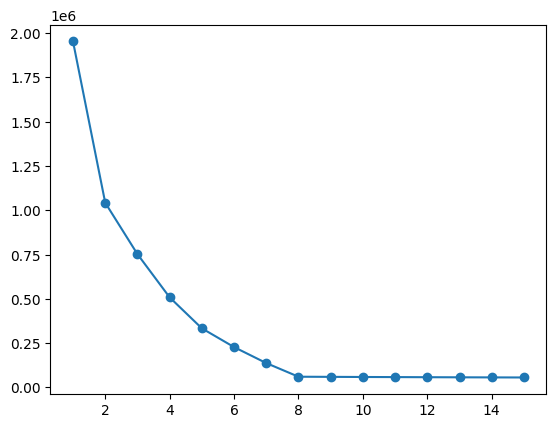

In [2]:
# 3번 cluster 개수 찾기
# 즉, 최적의 클러스터 개수 찾기!!!! -> 인터넷 검색 잘하자.
# 최적의 클러스터는 그래프가 꺽이기 시작하는 엘보우 부분!!
# 엘보우 기법 사용

import pickle 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

with open("final_dataset1.pkl", "rb") as f:
    data = pickle.load(f)

cluster = []
for i in range(1, 16):

    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=0)
    kmeans.fit(data)
    cluster.append(kmeans.inertia_)

plt.plot(range(1,16), cluster, marker='o')
plt.show()

# 8에서 그래프가 꺽이므로.. 최적의 클러스터 개수는 8












/Users/mok/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[ 26.99582325  -1.55049366]
 [ 27.17906128  -0.12062419]
 [ 27.45743221  -0.20147162]
 ...
 [-14.78295594  -8.5850701 ]
 [-12.3413997   -7.92362224]
 [-14.21023552  -9.50908134]]


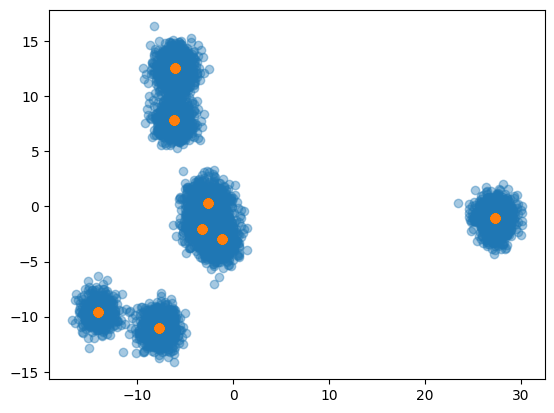

In [60]:
data.shape

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
pca = PCA(n_components=2) # 2차원으로 측소

pca_data = pca.fit_transform(data)

kmeans = KMeans(n_clusters=8)
kmeans.fit(pca_data)

print(pca_data)
# print(pca_data.shape)

# print(list(zip(kmeans.labels_, range(pca_data.shape[0]))))

centroids = []
for a, i in zip(kmeans.labels_, range(pca_data.shape[0])):
    centroids.append(kmeans.cluster_centers_[a])

centroids = np.array(centroids)
plt.scatter(pca_data[:,0], pca_data[:,1], alpha=0.4)
plt.scatter(centroids[:,0], centroids[:,1])
    



plt.show()
    










In [61]:
import numpy as np

v = np.array([2, 1, 2])
p = np.array([3, 3, 9])

# 백터 사영 공식!!
p_prime = p - (np.dot(p, v) / np.dot(v, v)) * v

print(p_prime)


[-3.  0.  3.]
